# Testing the ROC Curve for Classification Problems

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

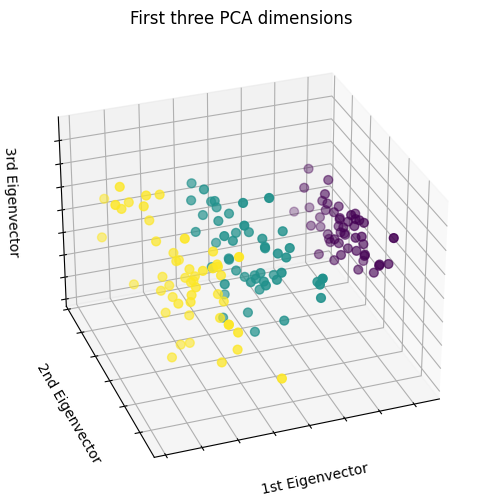

In [3]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [4]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = load_wine(return_X_y=True)
y = y == 2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

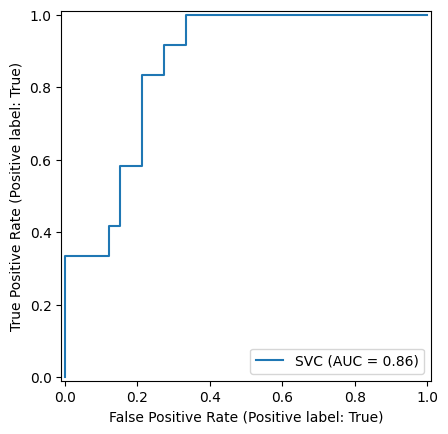

In [5]:
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.show()

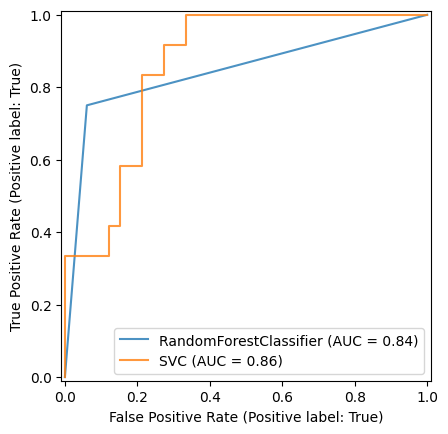

In [6]:
rfc = RandomForestClassifier(n_estimators=1, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [9]:
import numpy as np

m = np.arange(10, dtype=np.float64)
f = np.arange(10) * 2

In [10]:
m

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [11]:
f

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [12]:
a = np.arange(10) ** 2

In [13]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [14]:
ddof = 1
w = f * a
w

array([   0,    2,   16,   54,  128,  250,  432,  686, 1024, 1458])

In [17]:
v1 = np.sum(w)
v1

4050

In [18]:
v2 = np.sum(w * a)
v2

241650

In [19]:
m -= np.sum(m * w, axis=None, keepdims=True) / v1
m

array([-7.57185185, -6.57185185, -5.57185185, -4.57185185, -3.57185185,
       -2.57185185, -1.57185185, -0.57185185,  0.42814815,  1.42814815])

In [20]:
cov = np.dot(m * w, m.T) * v1 / (v1**2 -ddof * v2)
cov

2.3686219474841983

In [28]:
# Consider these values, which are correlated perfectly but in opposite directions. 
x = np.array([[2, 1, 0], [0, 1, 2]])
x

array([[2, 1, 0],
       [0, 1, 2]])

In [29]:
np.cov(x)

array([[ 1., -1.],
       [-1.,  1.]])

In [30]:
x = [-2.1, -1, 4.3]
y = [3, 1.1, 0.12]
X = np.stack((x, y), axis=0)
np.cov(X)

array([[11.71      , -4.286     ],
       [-4.286     ,  2.14413333]])

In [31]:
np.cov(y)

array(2.14413333)

In [32]:
np.cov(x)

array(11.71)

In [33]:
np.cov(x,y)

array([[11.71      , -4.286     ],
       [-4.286     ,  2.14413333]])

In [69]:
def covariance(x): 
    mean = sum(x) / len(x)

    top_values = []
    for i in range(len(x)): 
        top_values.append(x[i] - mean)
    sum_value = 0
    for values in top_values: 
        sum_value += values
    bottom = (len(x) - 1)
    cov = sum_value / bottom
    return cov

In [70]:
value = covariance([-2.1, -1, 4.3])

0.0


In [71]:
value

0.0